<img src="img/object_detection.png">

- Yukarıdaki resimde **nesne tespitiyle** köpeğin, bisikletin ya da arabanın koordinatları bulunur.
- Bu bir **nesne sınıflandırması** değildir. Bu aşamada *bu köpektir* gibi bir sınıflandırma yapılmayacaktır. 
- Yalnızca köpeğin resim üzerinde koordinatlarını bulup etrafına rectangle çizilecektir. 

<img src="img/feature.png">


<img src="img/edge.png">

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

## 1-Import Image

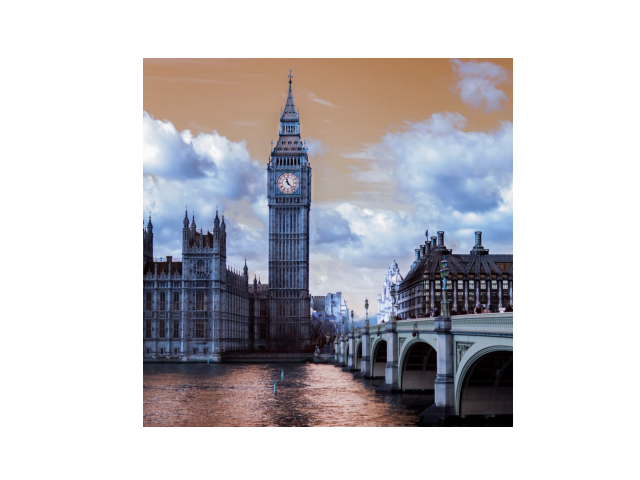

In [2]:
img_original = cv2.imread("img/london.jpg")
plt.figure(), plt.imshow(img_original, cmap = "gray"), plt.axis("off")
plt.show()

## 2-Convert Image to Gray

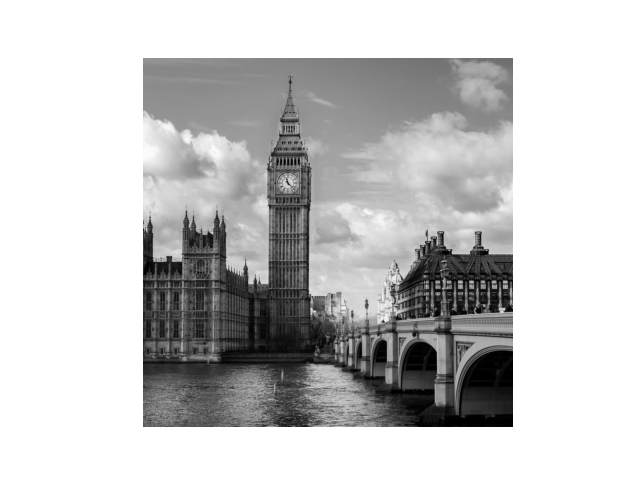

In [3]:
img = cv2.imread("img/london.jpg", 0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")
plt.show()

## 2-Edge Detection

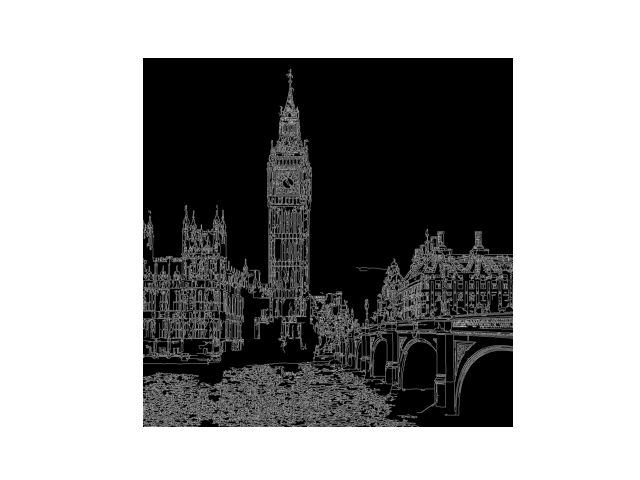

In [4]:
edges = cv2.Canny(image = img, threshold1 = 0, threshold2 = 255)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")
plt.show()

- Yukarıdaki plotta, su yüzeyinde de kenarlar mevcut, bunların kaldırılması, optimum threshold verilmesi gerek.
  - İlk olarak resmin median ya da mean değeri tercih edilir.
  - Daha sonra bu değerle alt ve üst threshold hesaplanır.
  - Elde edilen low anf high threshold değerleri ile yukarıdaki gibi tekrar edge detection yapılır.

In [14]:
median_value = np.median(img)
mean_value = np.mean(img)
print("Median Value:", median_value)
print("Mean Value:", mean_value)

Median Value: 140.0
Mean Value: 127.2525111111111


In [15]:
low = int(max(0, (1 - 0.33) * mean_value))
high = int(min(255, (1 + 0.33) * mean_value))
print(low)
print(high)

85
169


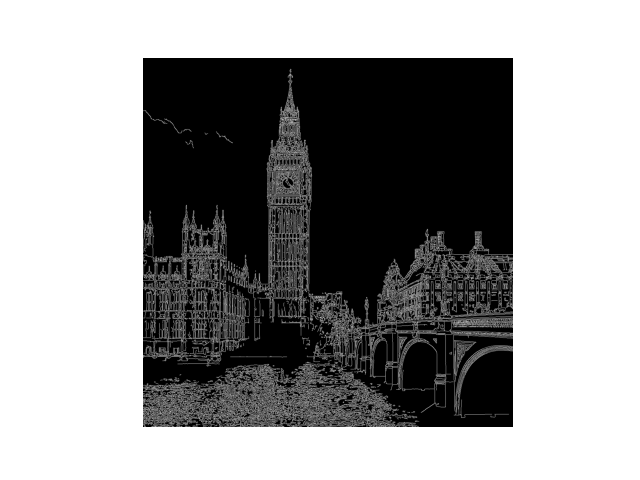

In [16]:
edges = cv2.Canny(image = img, threshold1 = low, threshold2 = high)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")
plt.show()

- Yukarıdaki plota göre edge detectionda threshold ayarlamaları çok az başarılı oldu.
- Şimdi su yüzündeki kenarlıkları azaltmak için blurring yapacağız.

## 3-Blur Image

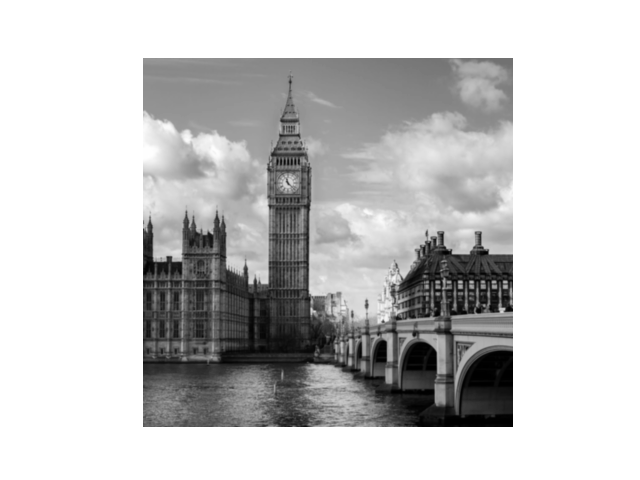

In [17]:
blurred_img = cv2.blur(img, ksize = (5,5))
plt.figure(), plt.imshow(blurred_img, cmap = "gray"), plt.axis("off")
plt.show()

## 4-Re-Edge Detection

In [22]:
median_value2 = np.median(blurred_img)
mean_value2 = np.mean(blurred_img)
print("Median Value:", median_value)
print("Mean Value:", mean_value)

Median Value: 139.0
Mean Value: 127.25323125


In [23]:
low = int(max(0, (1 - 0.33) * mean_value2))
high = int(min(255, (1 + 0.33) * mean_value2))
print(low)
print(high)

85
169


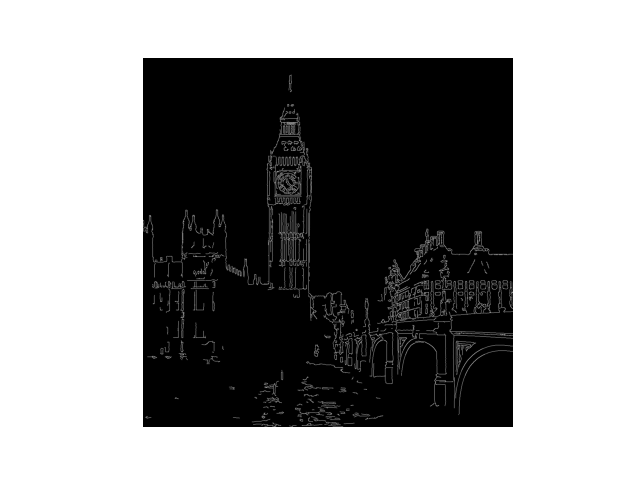

In [24]:
edges = cv2.Canny(image = blurred_img, threshold1 = low, threshold2 = high)
plt.figure(), plt.imshow(edges, cmap = "gray"), plt.axis("off")
plt.show()

- Yukarıdaki plota göre birçok ayrıntılar biraz azaldı.
- Ancak amaç kenar tespiti olduğundan işlem başarılı bir şekilde gerçekleşti.
- Sudaki kenarlar neredeyse hiç kalmadı. 
- Suda hiç olmamasını isteniyorsa kernal_size'ı 3x3 yapılabilir.